In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import scipy

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


# EDA

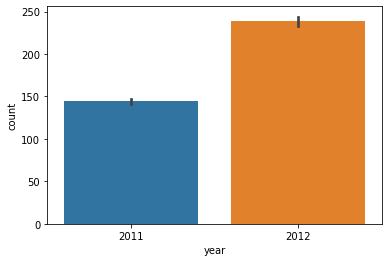

In [5]:
# 연도별 자전거 수요량
sns.barplot(data = train, x = 'year', y = 'count')
plt.savefig('year-count.png', bbox_inches='tight')

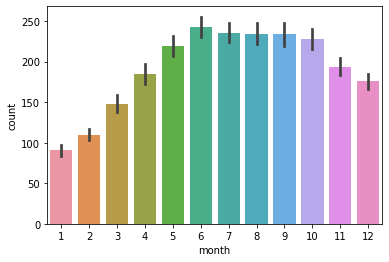

In [6]:
# 월별 자전거 수요량
sns.barplot(data = train, x = 'month', y = 'count')
plt.savefig('month-count.png', bbox_inches='tight')

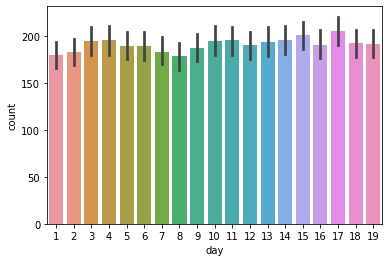

In [7]:
# 일별 자전거 수요량
sns.barplot(data = train, x = 'day', y = 'count')
plt.savefig('day-count.png', bbox_inches='tight')

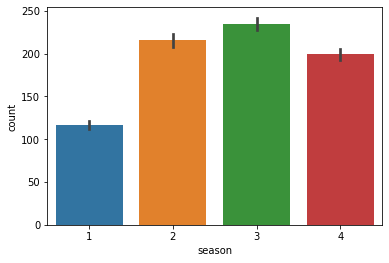

In [8]:
# 계절별 자전거 수요량
sns.barplot(data = train, x = 'season', y = 'count')
plt.savefig('season-count.png', bbox_inches='tight')

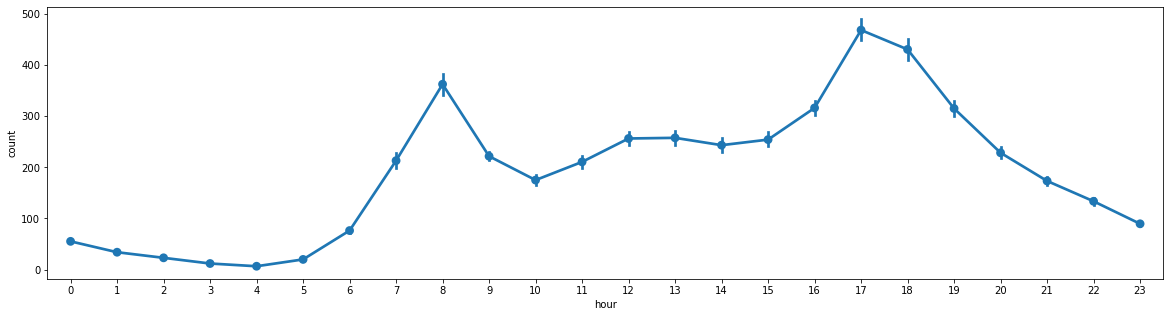

In [9]:
# 시간대별 자전거 수요량
plt.figure(figsize=(20, 5))
sns.pointplot(data = train, x = 'hour', y = 'count')
plt.savefig('hour-count.png', bbox_inches='tight')

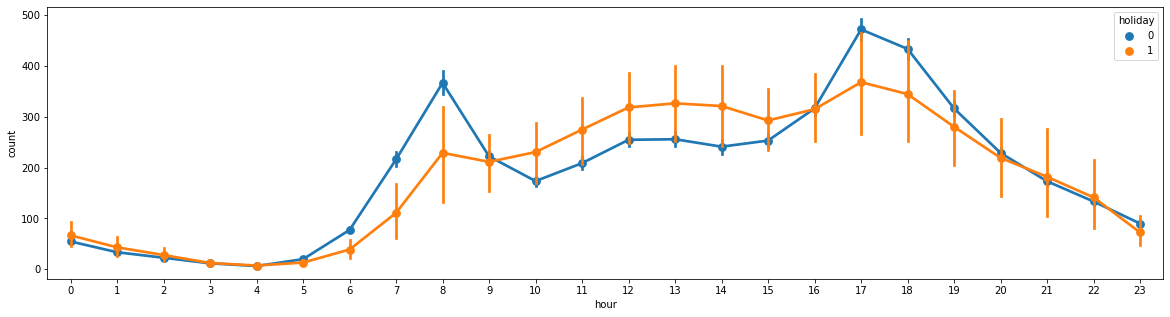

<Figure size 432x288 with 0 Axes>

In [10]:
# 휴일 여부에 따른 시간별 자전거 수요
plt.figure(figsize=(20, 5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday')
plt.show()
plt.savefig('hour-holiday-count.png', bbox_inches='tight')

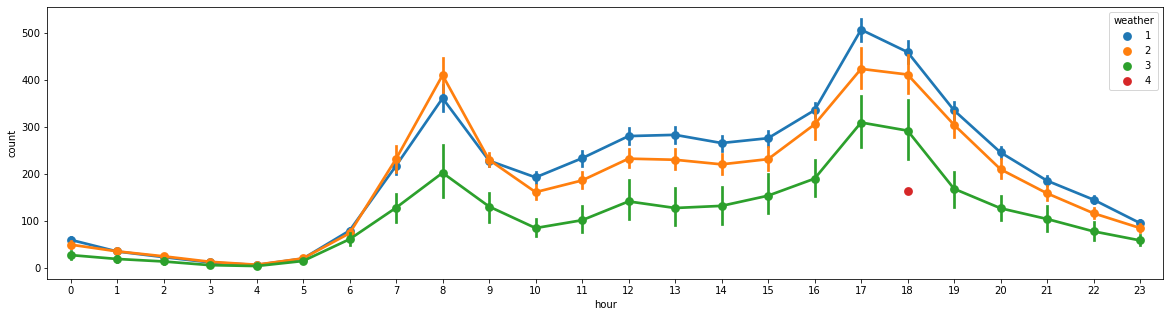

In [11]:
# 날씨에 따른 시간별 자전거 수요
plt.figure(figsize=(20, 5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')
plt.savefig('hour-weather-count.png', bbox_inches='tight')

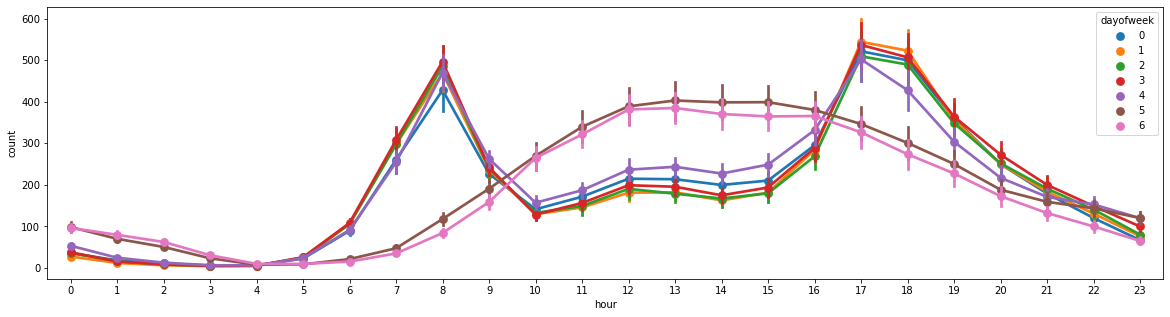

In [12]:
# 요일에 따른 시간대별 자전거 수요
plt.figure(figsize=(20, 5))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek')
plt.savefig('hour-dayofweek-count.png', bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


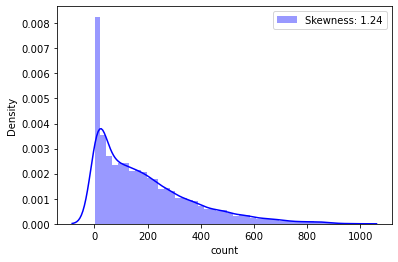

In [13]:
graph = sns.distplot(train['count'], color='b', label='Skewness: {:.2f}'.format(train['count'].skew()))
graph = graph.legend(loc = 'best')
plt.savefig('count_skewness.png', bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


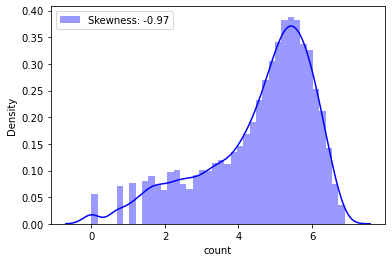

In [14]:
train['count'] = train['count'].map(lambda i : np.log(i) if i > 0 else 0)
graph = sns.distplot(train['count'], color='b', label='Skewness: {:.2f}'.format(train['count'].skew()))
graph = graph.legend(loc = 'best')
plt.savefig('log_count_skewness.png', bbox_inches='tight')

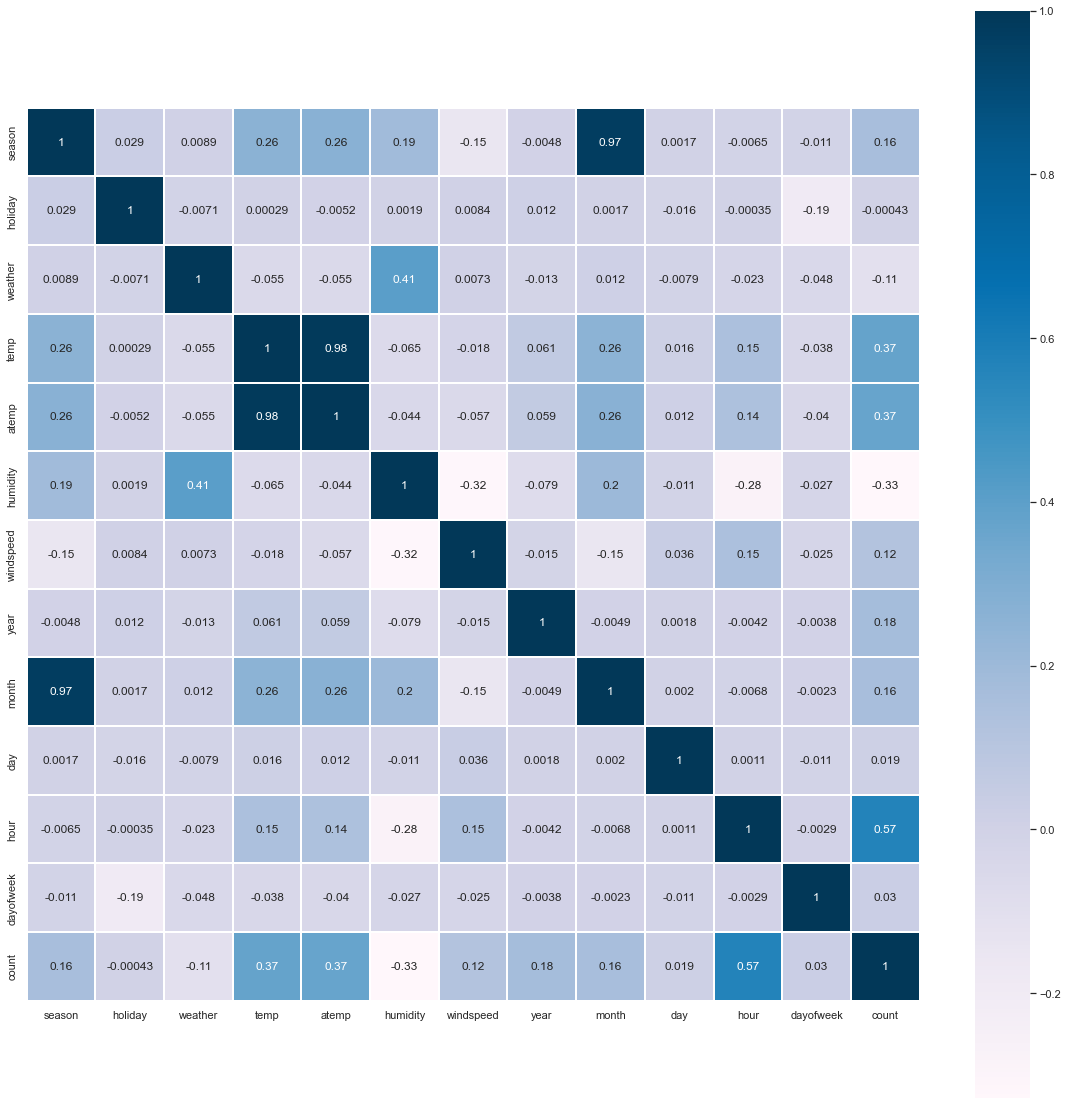

In [15]:
# 변수들의 상관관계

corr_data = train[['season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 
              'windspeed', 'year', 'month', 'day', 'hour', 'dayofweek', 'count']]

colormap = plt.cm.PuBu
sns.set(rc = {'figure.figsize' : (20, 20)})
sns.heatmap(corr_data.corr(),
           linewidths = 0.1,
           square = True,
           annot = True,
           cmap = colormap)
plt.savefig('heatmap.png', bbox_inches='tight')

In [27]:
X_train = train.drop(['datetime', 'atemp', 'season', 'count', 'casual', 'registered'], axis=1, inplace=False).values
X_test = test.drop(['datetime', 'atemp', 'season'], axis=1, inplace=False).values
y_train = train[['count']].values

# 선형 회귀

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=21)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)


train_y_pred = lr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_y_pred))
train_r2score = r2_score(y_train, train_y_pred)

y_pred = lr.predict(X_valid)
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
valid_r2score = r2_score(y_valid, y_pred)
print("Train RMSE: {0:.3f}, Train R2 Score: {1:.3f}".format(train_rmse, train_r2score))
print("Valid RMSE: {0:.3f}, Valid R2 Score: {1:.3f}".format(valid_rmse, valid_r2score))

Train RMSE: 1.074, Train R2 Score: 0.480
Valid RMSE: 1.068, Valid R2 Score: 0.483


In [19]:
import torch
from torch import nn, optim 
from torch.utils.data import DataLoader, Dataset 
import torch.nn.functional as F 

# 텐서 데이터와 배치 만들기
class TensorData(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len
    
trainset = TensorData(X_train, y_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

validset = TensorData(X_valid, y_valid)
validloader = torch.utils.data.DataLoader(validset, batch_size=32, shuffle=False)

In [20]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__() 
        self.fc1 = nn.Linear(11, 40, bias=True)
        self.fc2 = nn.Linear(40, 20, bias=True)
        self.fc3 = nn.Linear(20, 1, bias=True)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))
        return x

In [21]:
model = Regressor()
cost = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-7)

In [22]:
loss_ = []
n = len(trainloader)

for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, values = data
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = cost(outputs, values)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    loss_.append(running_loss/n)
    
print('Finished Training')

Finished Training


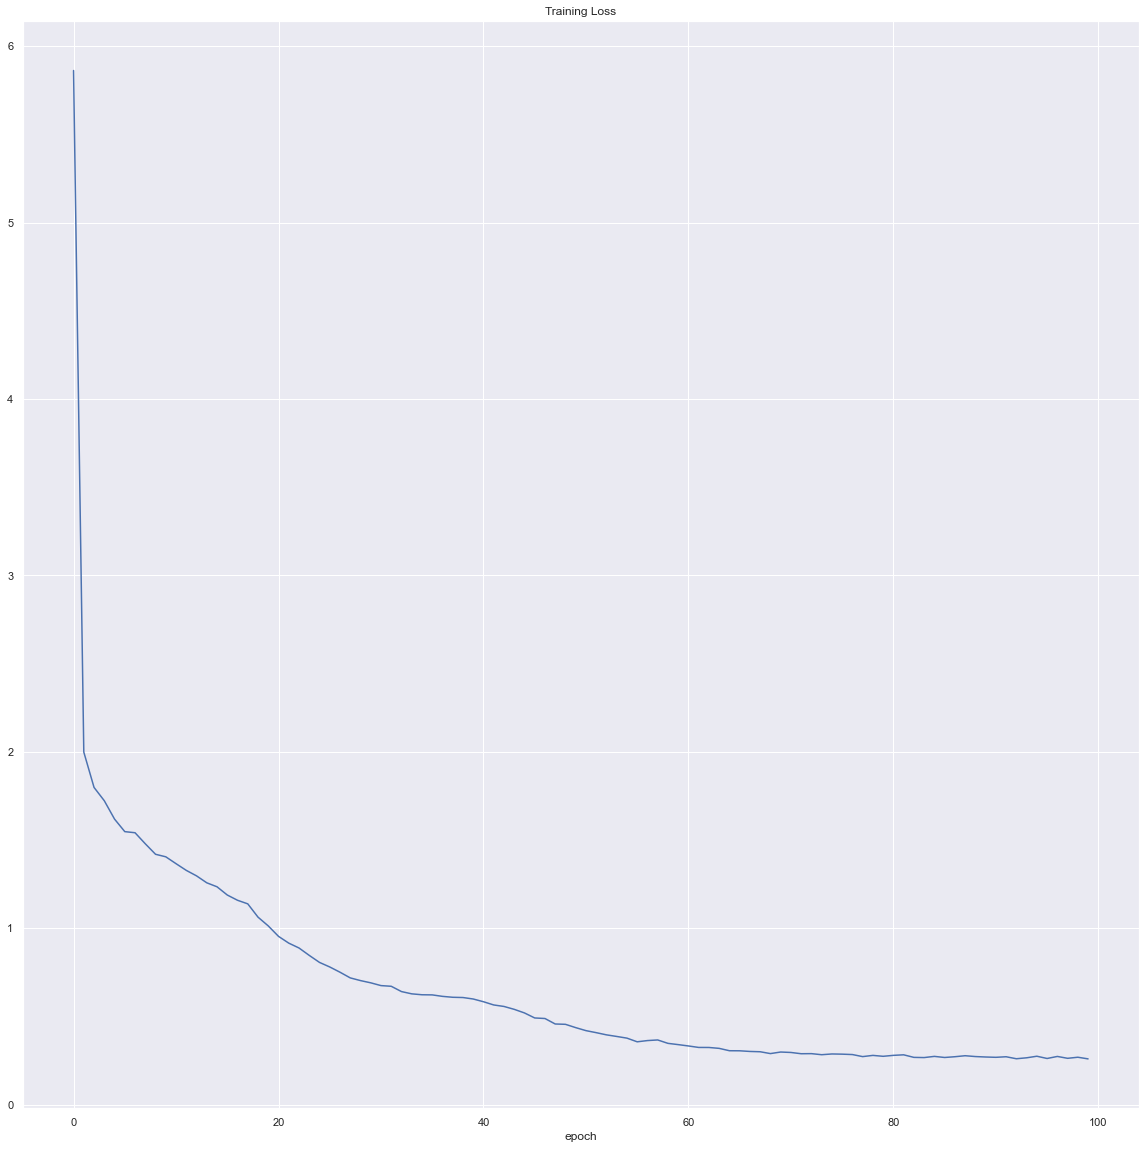

<Figure size 1440x1440 with 0 Axes>

In [23]:
plt.plot(loss_)
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('Training Loss.png', bbox_inches='tight')

In [24]:
def evaluation(dataloader):
    
    predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서
    actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서
        
    with torch.no_grad():
        model.eval() 
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)

            predictions = torch.cat((predictions, outputs), 0) 
            actual = torch.cat((actual, values), 0) 

    rmse = np.sqrt(mean_squared_error(predictions, actual))
    r2score = r2_score(predictions, actual)
    return rmse, r2score

train_rmse, train_r2score = evaluation(trainloader)
valid_rmse, valid_r2score = evaluation(validloader)

print("Train RMSE: {0:.3f}, Train R2 Score: {1:.3f}".format(train_rmse, train_r2score))
print("Valid RMSE: {0:.3f}, Valid R2 Score: {1:.3f}".format(valid_rmse, valid_r2score))

Train RMSE: 0.379, Train R2 Score: 0.924
Valid RMSE: 0.402, Valid R2 Score: 0.913


In [39]:
predictions = torch.tensor([], dtype=torch.float)
X_train = np.concatenate((X_train, X_valid))
y_train = np.concatenate((y_train, y_valid))
dataset = TensorData(X_train, y_train)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)
for data in trainloader:
    inputs, values = data
    outputs = model(inputs)
    predictions = torch.cat((predictions, outputs), 0)

# Testset 예측

In [56]:
X_test = scaler.transform(X_test)
pred = torch.tensor([], dtype=torch.float)
for x in X_test:
    pred = torch.cat((pred, model.forward(torch.tensor(x, dtype=torch.float))), 0)

In [70]:
pred = np.exp(pred.detach().numpy())

# 제출 파일 만들기

In [75]:
sample = pd.read_csv("SampleSubmission.csv")
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [76]:
submission = pd.DataFrame()
submission['datetime'] = sample['datetime']
submission['count'] = pred
submission

,datetime,count
0,2011-01-20 00:00:00,12.247664
1,2011-01-20 01:00:00,8.934912
2,2011-01-20 02:00:00,4.634695
3,2011-01-20 03:00:00,2.084338
4,2011-01-20 04:00:00,3.220656
...,...,...
6488,2012-12-31 19:00:00,341.903778
6489,2012-12-31 20:00:00,279.268066
6490,2012-12-31 21:00:00,186.942764
6491,2012-12-31 22:00:00,151.397949


In [77]:
submission = pd.DataFrame()
submission['datetime'] = sample['datetime']
submission['count'] = pred
submission.to_csv("Bike.csv", index=False)